In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

In [10]:
df = pd.read_csv(r'datasets\master.csv')

In [11]:
df = pd.DataFrame(df)

In [12]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [13]:
alb_df_1524 = df[(df['country'] == 'Albania') & (df['age'] == '15-24 years')]
alb_df_1524 = alb_df_1524.set_index('year')

<AxesSubplot:xlabel='year'>

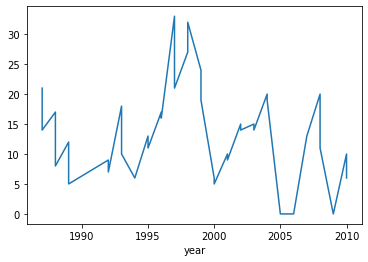

In [14]:
alb_df_1524['suicides_no'].plot(kind = 'line')